In [34]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

DB_PATH = '../database/fair_sampling.db'

In [42]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT seed, od_variance, post_anneal_od_variance FROM instances_N8
WHERE post_anneal_od_variance IS NOT NULL;

"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [46]:
df

,seed,od_variance,post_anneal_od_variance
0,152,0.20139,0.05556
1,156,0.20139,0.05556
2,231,0.20139,0.05556
3,243,0.20139,0.05556
4,348,0.20139,0.05556
...,...,...,...
97,9453,0.20139,0.05556
98,9548,0.20139,0.05556
99,9621,0.20139,0.05556
100,9815,0.20139,0.05556


In [50]:
print(df["od_variance"].mean())
print(df["post_anneal_od_variance"].mean())

0.2012256862745098
0.05691607843137256


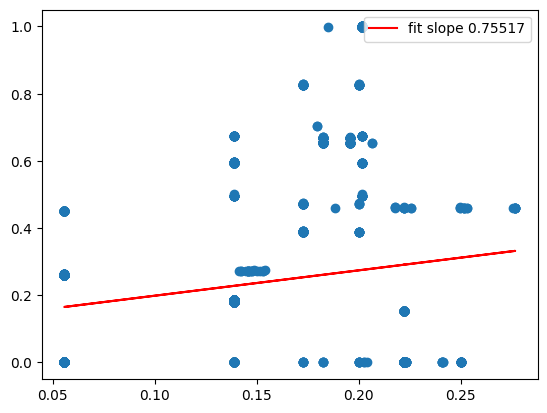

In [41]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT seed, od_variance, post_anneal_supp_ratio FROM instances_N8
WHERE degeneracy > 2

"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

plt.scatter(df["od_variance"], df["post_anneal_supp_ratio"])

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(df["od_variance"], df["post_anneal_supp_ratio"], 1)

# Calculate the predicted values
fit_line = slope * df["od_variance"] + intercept

# Plot the fit line
plt.plot(df["od_variance"], fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.legend()

plt.show()